In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import os

def get_newest_csv_file(dir_path):
    csv_files = []
    for file in os.listdir(dir_path):
        if file.endswith(".csv"):
            csv_files.append(file)
    if not csv_files:
        return None
    newest_csv_file = max(csv_files, key=os.path.getctime)
    return os.path.join(dir_path, newest_csv_file)

In [2]:
csv_file = get_newest_csv_file('/Users/heiko/Development/drasyl/')
print(csv_file)

/Users/heiko/Development/drasyl/WormholeSendChildChannelInitializer-25942.csv


In [3]:
df = pd.read_csv(csv_file)

# RFC 9293: Send Sequence Variables
df['Rel.SND.UNA'] = df['SND.UNA'] - df['ISS']
df['Rel.SND.NXT'] = df['SND.NXT'] - df['ISS']
df['Rel.SND.WL1'] = df['SND.WL1'] - df['IRS']
df['Rel.SND.WL2'] = df['SND.WL2'] - df['IRS']

# RFC 9293: Receive Sequence Variables
df['Rel.RCV.NXT'] = df['RCV.NXT'] - df['IRS']

# RFC 5681: TCP Congestion Control
df['FLIGHT SIZE'] = df['SND.NXT'] - df['SND.UNA']

df

,pid,time,SND.UNA,SND.NXT,SND.WND,SND.WL1,SND.WL2,ISS,SND.BUF,RCV.NXT,...,SRTT,RTO,cwnd,ssthresh,Rel.SND.UNA,Rel.SND.NXT,Rel.SND.WL1,Rel.SND.WL2,Rel.RCV.NXT,FLIGHT SIZE
0,25942,"Sat, 25 Mar 2023 00:51:50 +0100",1675713648,1675713648,524280,1523094854,1675713648,1675713647,0,1523094854,...,6.0,1000,3769,65535,1,1,1,152618795,1,0
1,25942,"Sat, 25 Mar 2023 00:51:50 +0100",1675713648,1675713726,524280,1523094854,1675713648,1675713647,0,1523094896,...,19.0,1000,3769,65535,1,79,1,152618795,43,78
2,25942,"Sat, 25 Mar 2023 00:51:50 +0100",1675713726,1675717308,524202,1523094896,1675713726,1675713647,70146,1523094896,...,22.0,1000,3847,65535,79,3661,43,152618873,43,3582
3,25942,"Sat, 25 Mar 2023 00:51:51 +0100",1675739994,1675769844,523086,1523094896,1675739994,1675713647,58570,1523094896,...,28.0,1000,30115,65535,26347,56197,43,152645141,43,29850
4,25942,"Sat, 25 Mar 2023 00:51:51 +0100",1675830738,1675935810,466968,1523094896,1675830738,1675713647,56444,1523094896,...,26.0,1000,105738,33432,117091,222163,43,152735885,43,105072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,25942,"Sat, 25 Mar 2023 01:00:05 +0100",2338526130,2338560756,523086,1523094896,2338526130,1675713647,49610,1523094896,...,20.0,1000,35130,29850,662812483,662847109,43,815431277,43,34626
4949,25942,"Sat, 25 Mar 2023 01:00:05 +0100",2338670604,2338692096,521892,1523094896,2338670604,1675713647,190,1523094896,...,20.0,1000,40023,29850,662956957,662978449,43,815575751,43,21492
4950,25942,"Sat, 25 Mar 2023 01:00:05 +0100",2338692286,2338692286,524090,1523094896,2338692286,1675713647,0,1523094896,...,20.0,1000,40741,29850,662978639,662978639,43,815597433,43,0
4951,25942,"Sat, 25 Mar 2023 01:00:05 +0100",2338692286,2338692286,524090,1523094896,2338692286,1675713647,0,1523094896,...,20.0,1000,40741,29850,662978639,662978639,43,815597433,43,0


# RFC 9293: Send Sequence Variables

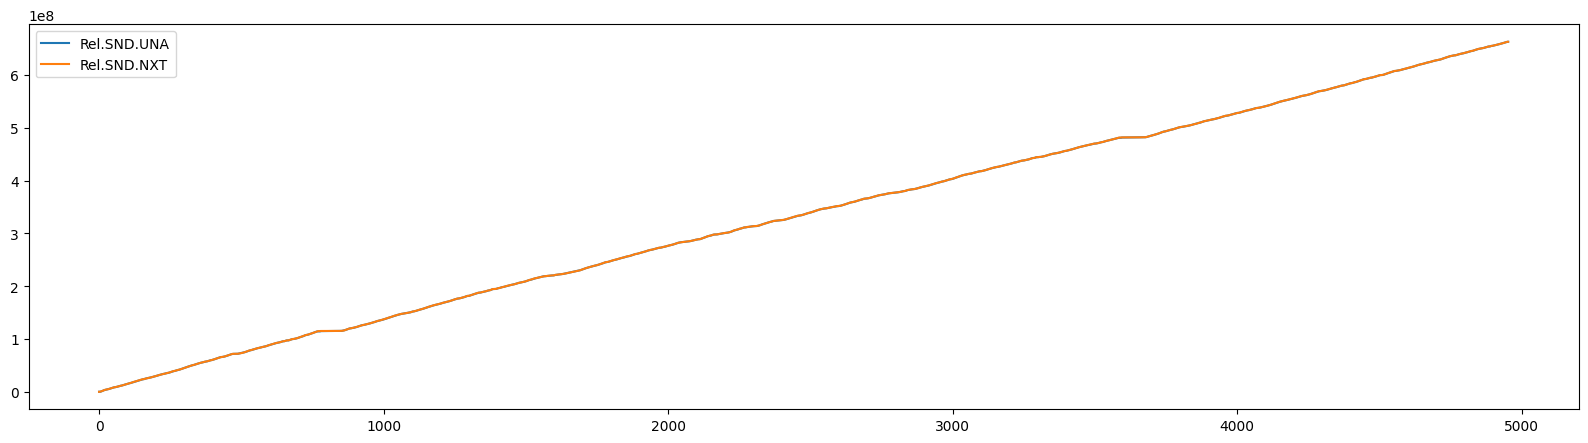

In [4]:
df.plot(y=['Rel.SND.UNA', 'Rel.SND.NXT'], figsize=(20, 5))
mp.show()

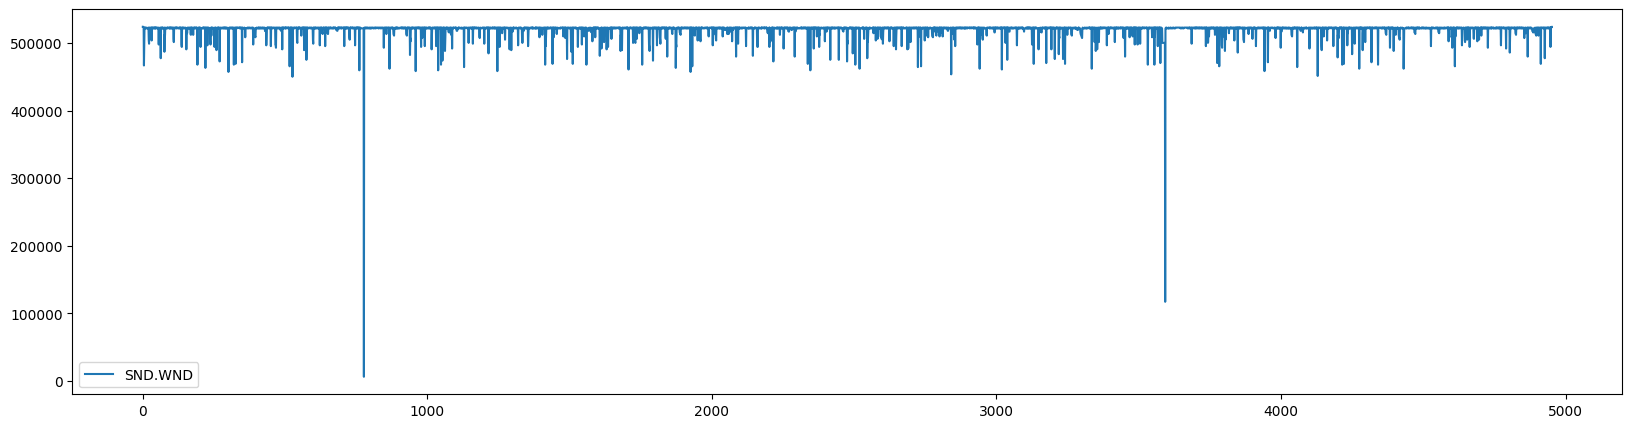

In [5]:
df.plot(y=['SND.WND'], figsize=(20, 5))
mp.show()

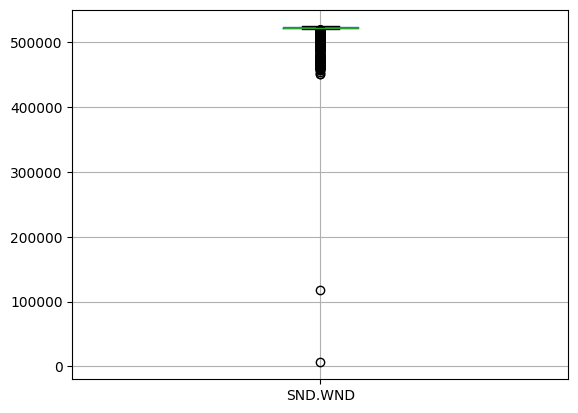

In [6]:
df.boxplot(column=['SND.WND'])
mp.show()

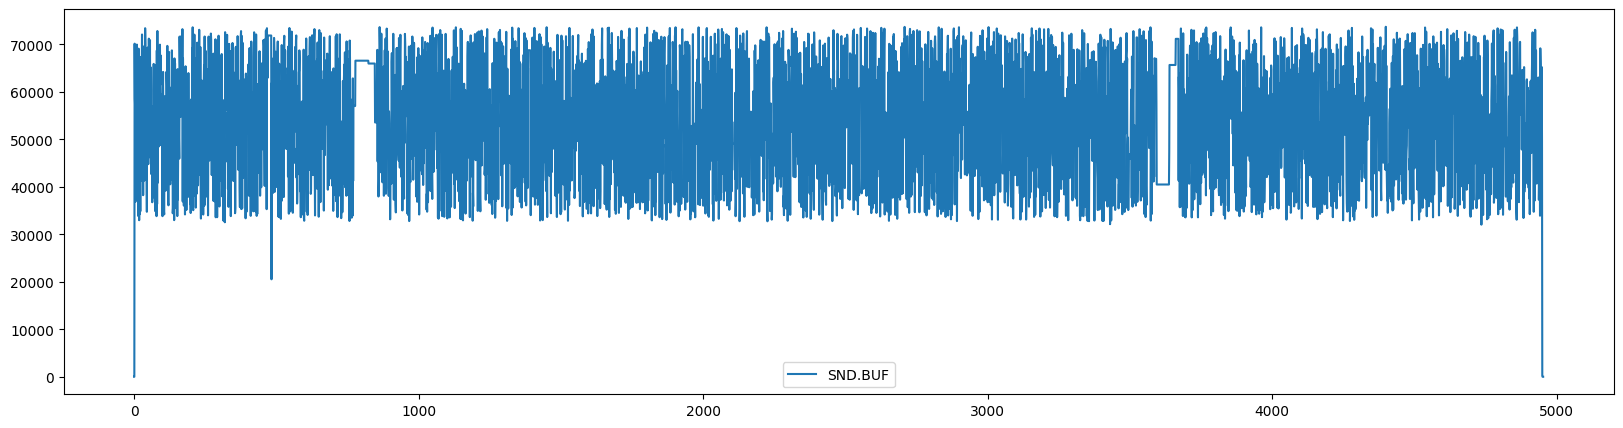

In [7]:
df.plot(y=['SND.BUF'], figsize=(20, 5))
mp.show()

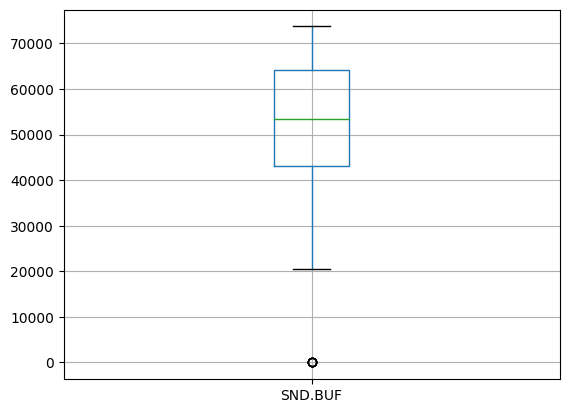

In [8]:
df.boxplot(column=['SND.BUF'])
mp.show()

# RFC 9293: Receive Sequence Variables

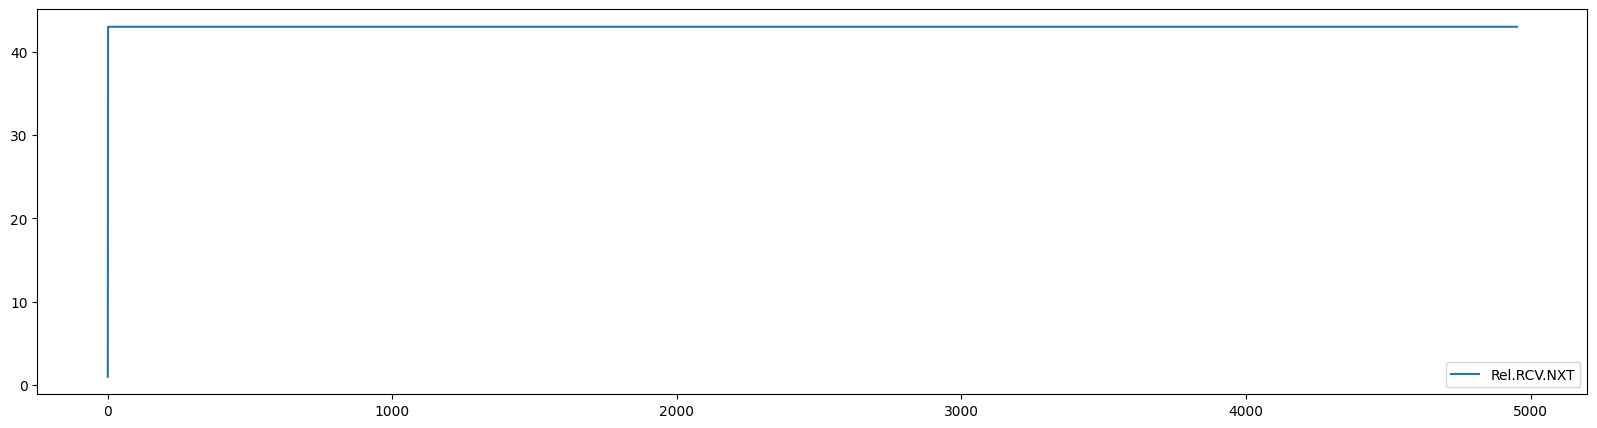

In [9]:
df.plot(y=['Rel.RCV.NXT'], figsize=(20, 5))
mp.show()

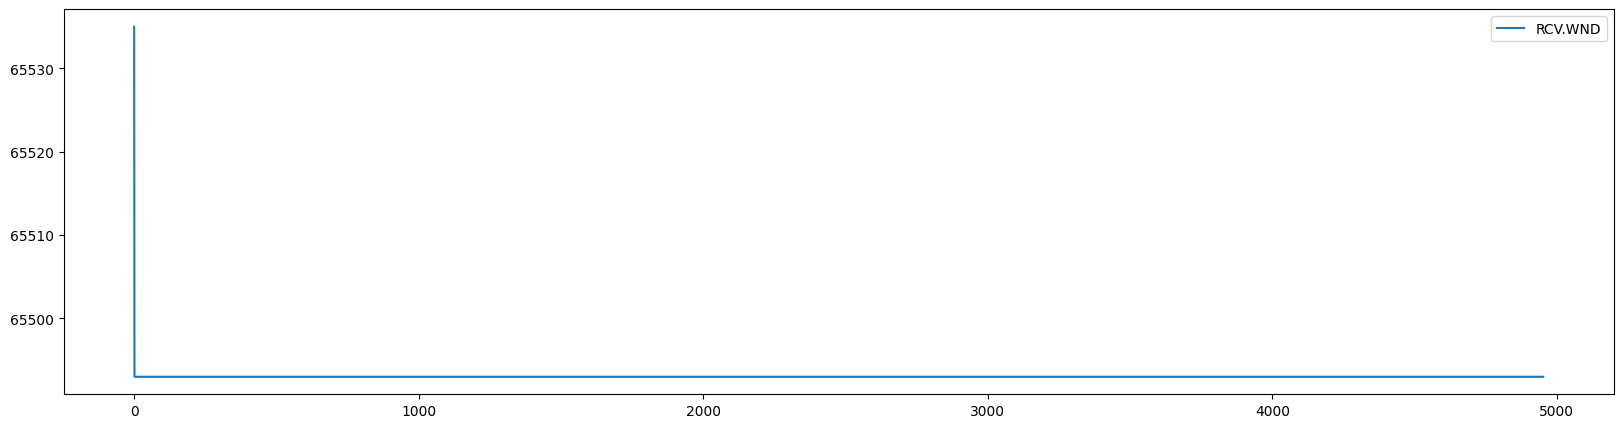

In [10]:
df.plot(y=['RCV.WND'], figsize=(20, 5))
mp.show()

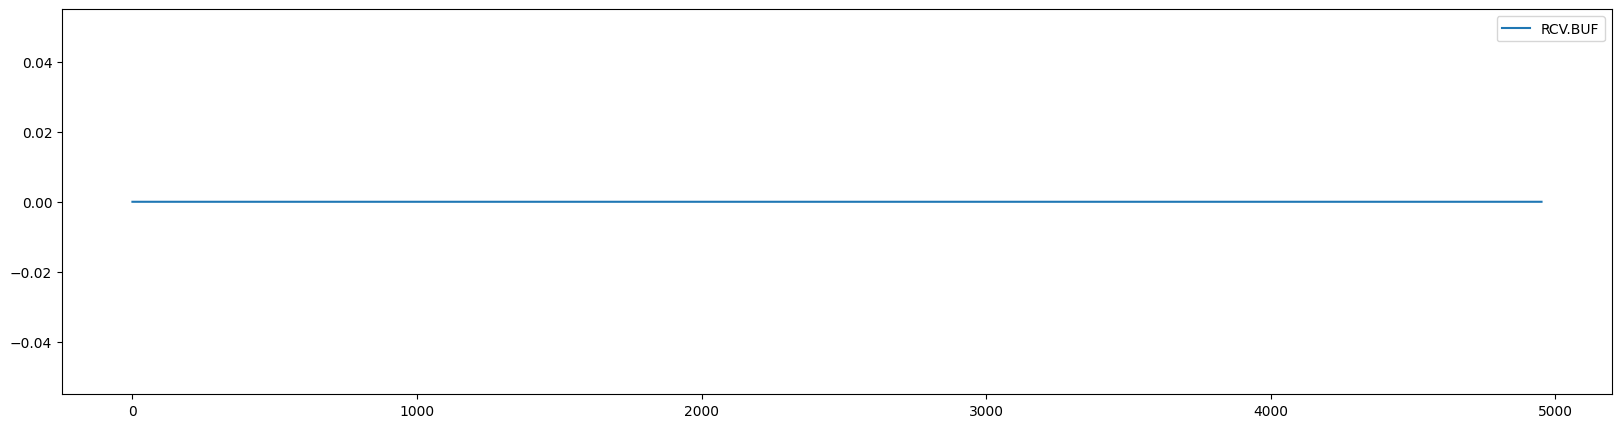

In [11]:
df.plot(y=['RCV.BUF'], figsize=(20, 5))
mp.show()

# RFC 6298: Retransmission Timer Computation

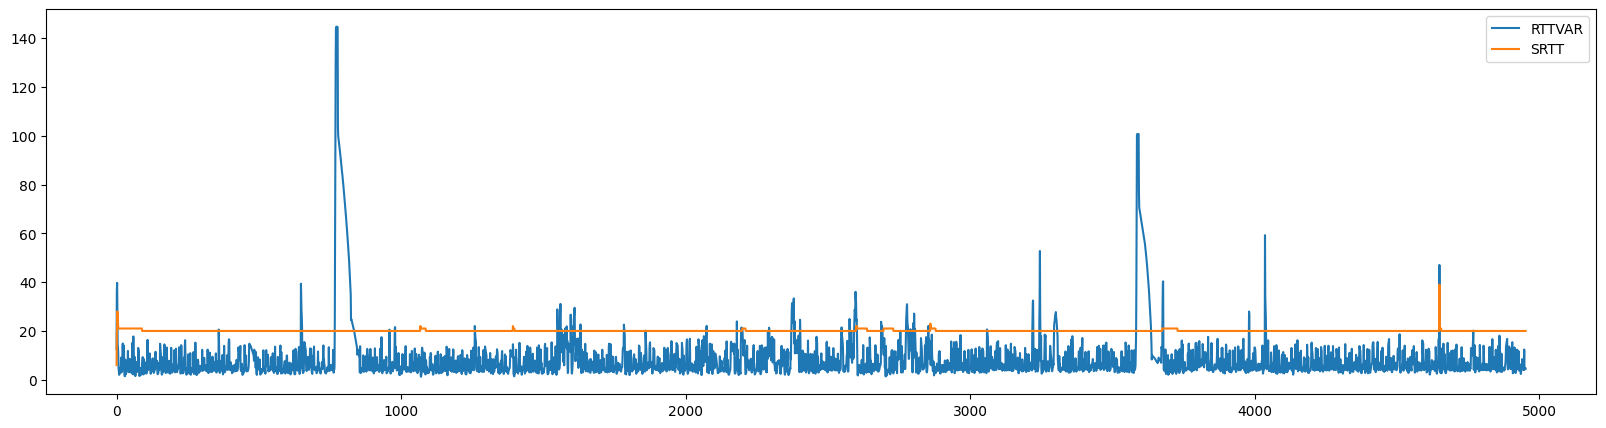

In [12]:
df.plot(y=['RTTVAR', 'SRTT'], figsize=(20, 5))
mp.show()

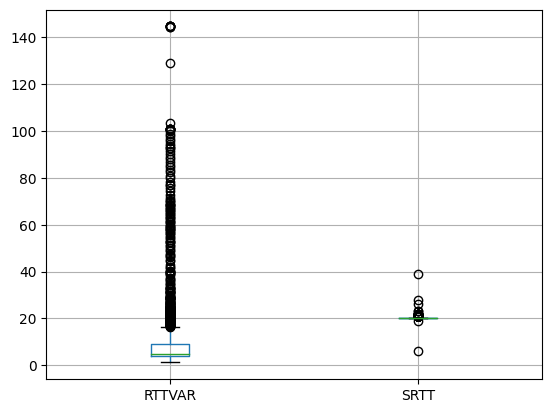

In [13]:
df.boxplot(column=['RTTVAR', 'SRTT'])
mp.show()

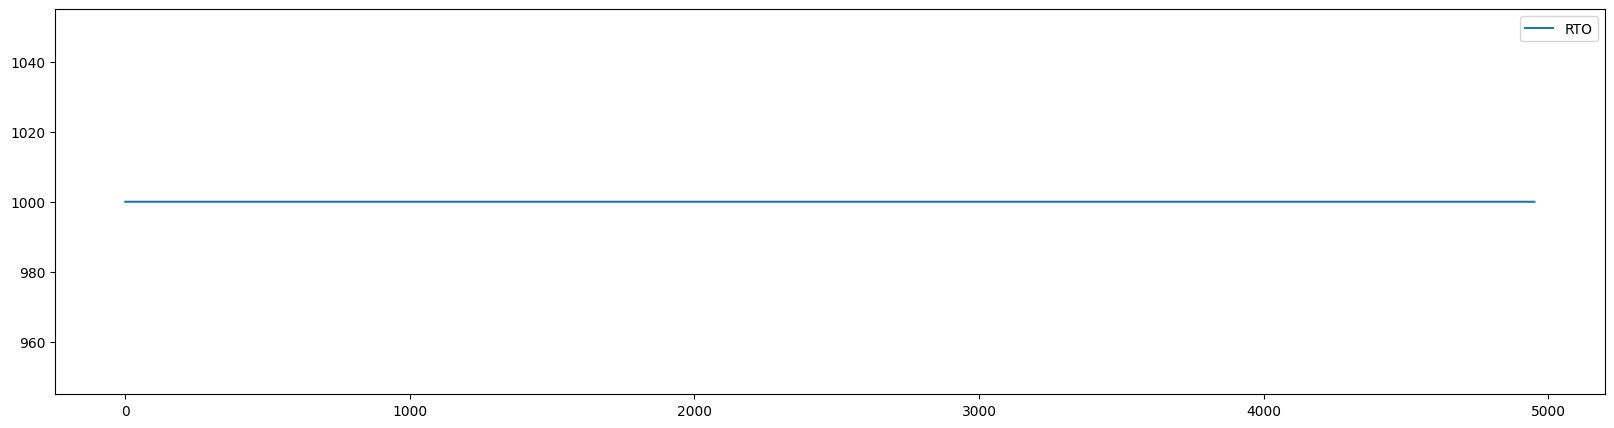

In [14]:
df.plot(y=['RTO'], figsize=(20, 5))
mp.show()

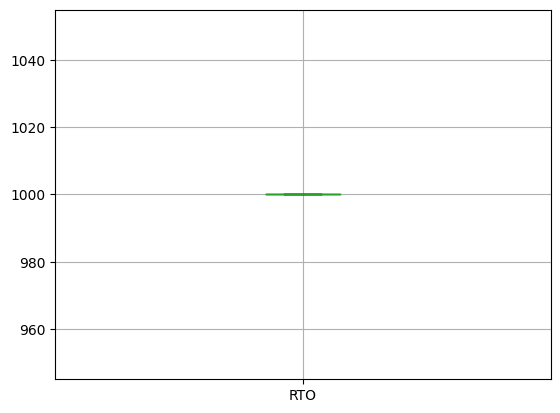

In [15]:
df.boxplot(column=['RTO'])
mp.show()

# RFC 5681: Congestion Control Algorithms

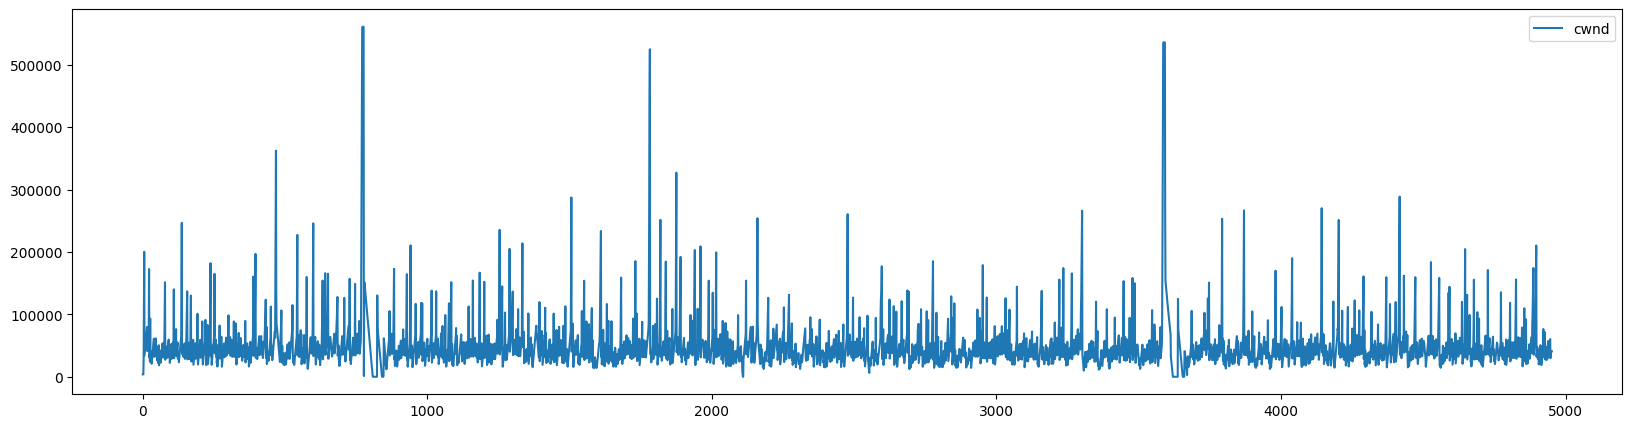

In [16]:
df.plot(y=['cwnd'], figsize=(20, 5))
mp.show()

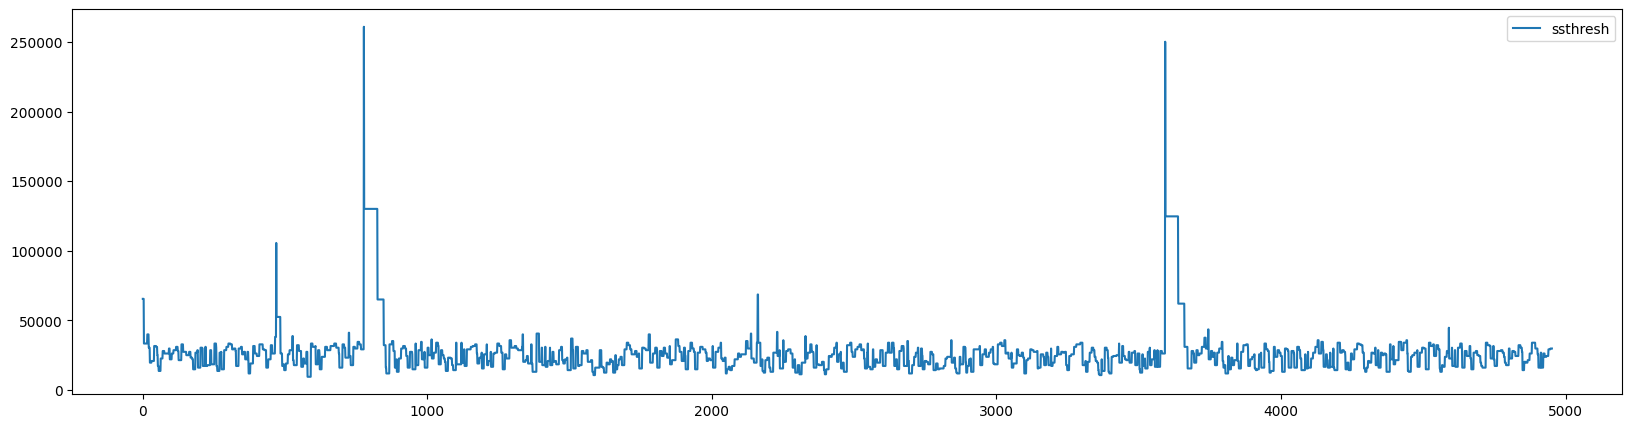

In [17]:
df.plot(y=['ssthresh'], figsize=(20, 5))
mp.show()

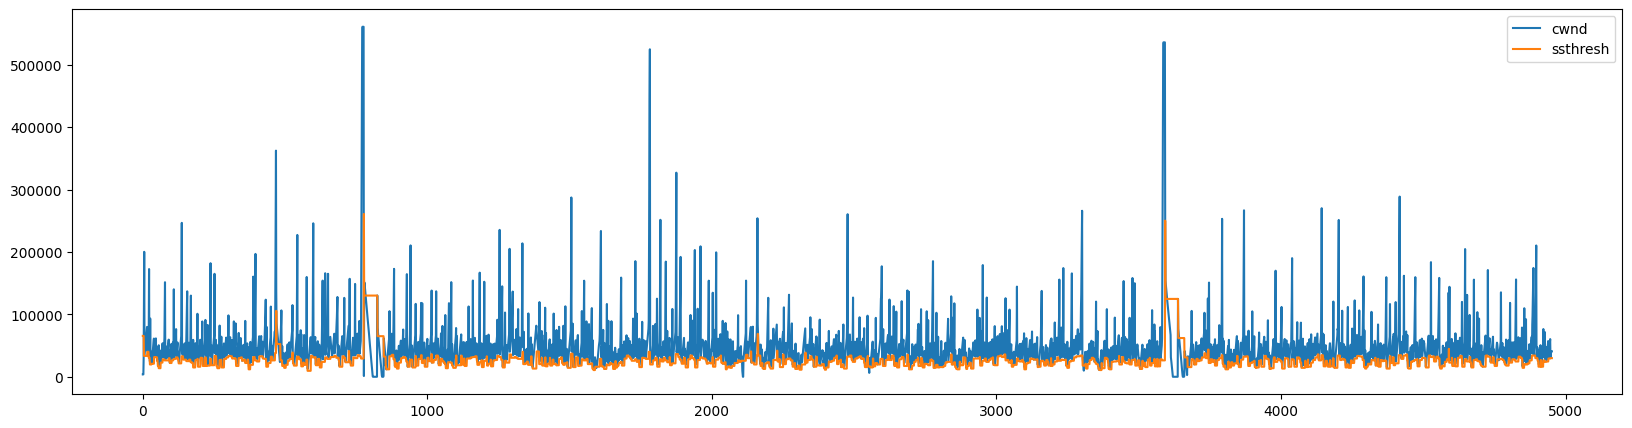

In [18]:
df.plot(y=['cwnd', 'ssthresh'], figsize=(20, 5))
mp.show()

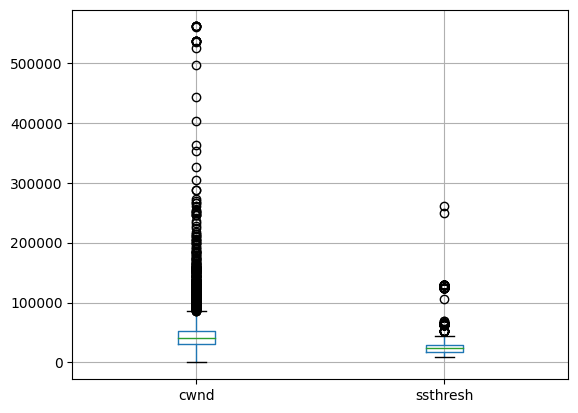

In [19]:
df.boxplot(column=['cwnd', 'ssthresh'])
mp.show()

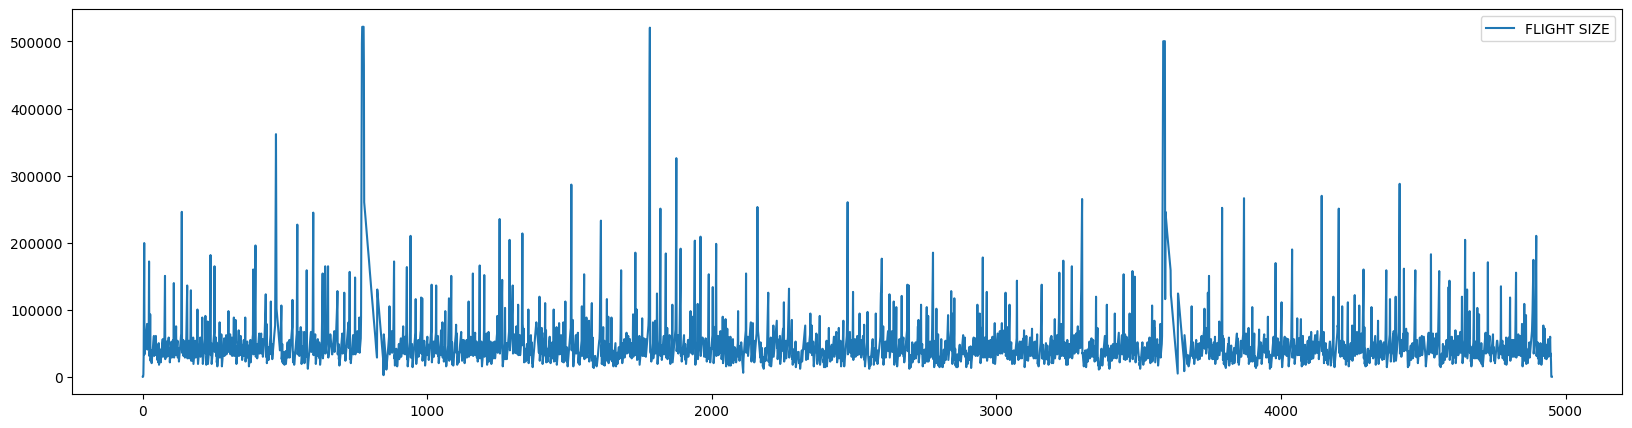

In [20]:
df.plot(y=['FLIGHT SIZE'], figsize=(20, 5))
mp.show()

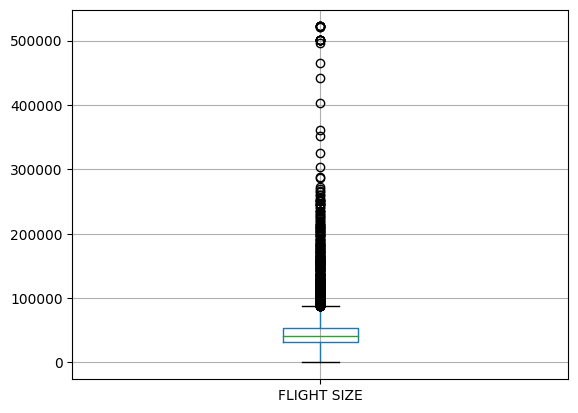

In [21]:
df.boxplot(column=['FLIGHT SIZE'])
mp.show()